In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('BreadBasket_DMS.xlsx')

In [4]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


## Goal: Cluster different customers of the Bakery

In [5]:
df['datetime'] = pd.to_datetime(df.Date + ' '+ df.Time)

TypeError: ignored

In [6]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [7]:
df.drop(['Date','Time'], axis=1, inplace=True)

In [8]:
df.head()

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [9]:
df.Item.nunique()

95

In [10]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [11]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [12]:
df['beverage'] = df.Item.isin(beverage).astype(int)
df['other'] = df.Item.isin(other).astype(int)
df['kids'] = df.Item.isin(kids).astype(int)
df['snacks'] = df.Item.isin(snacks).astype(int)
df['bread'] = df.Item.isin(bread).astype(int)
df['breakfast_pastry'] = df.Item.isin(breakfast_pastry).astype(int)
df['breakfast'] = df.Item.isin(breakfast).astype(int)
df['dessert'] = df.Item.isin(dessert).astype(int)
df['condiments'] = df.Item.isin(condiments).astype(int)
df['lunch'] = df.Item.isin(lunch).astype(int)
df['other_food'] = df.Item.isin(other_food).astype(int)

In [13]:
df.head()

,Transaction,Item,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
0,1,Bread,0,0,0,0,1,0,0,0,0,0,0
1,2,Scandinavian,0,0,0,0,1,0,0,0,0,0,0
2,2,Scandinavian,0,0,0,0,1,0,0,0,0,0,0
3,3,Hot chocolate,1,0,0,0,0,0,0,0,0,0,0
4,3,Jam,0,0,0,0,0,0,0,0,1,0,0


In [14]:
df_group = df.groupby(['Transaction','datetime']).sum()
df_group.reset_index(level='datetime', inplace=True)

KeyError: ignored

In [15]:
df_group['hour']=df_group.datetime.dt.hour
df_group['weekday']=df_group.datetime.dt.day_name()

NameError: ignored

In [16]:
df_group.head()

NameError: ignored

In [17]:
df_group.weekday.value_counts()

NameError: ignored

In [18]:
df_group.hour.hist()

NameError: ignored

In [19]:
df_group.datetime.dt.month.value_counts()

NameError: ignored

In [20]:
df_group.drop('datetime', axis=1, inplace=True)

NameError: ignored

In [21]:
df_ml = pd.get_dummies(data = df_group, columns=['weekday'], drop_first=True).copy()

NameError: ignored

In [22]:
df_ml.head()

NameError: ignored

# PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(0.85)
pca.fit(df_ml)
df_pca = pca.transform(df_ml)

NameError: ignored

In [ ]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,6)])

# Clustering


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
! pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

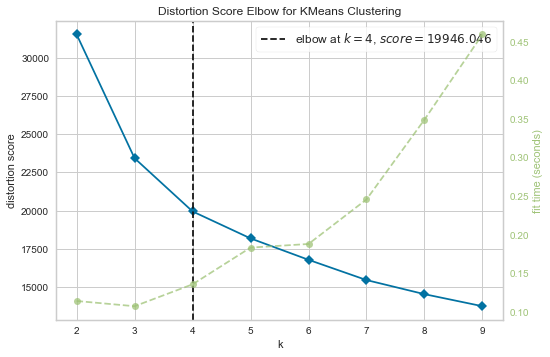

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(df_pca)
visualizer.poof()

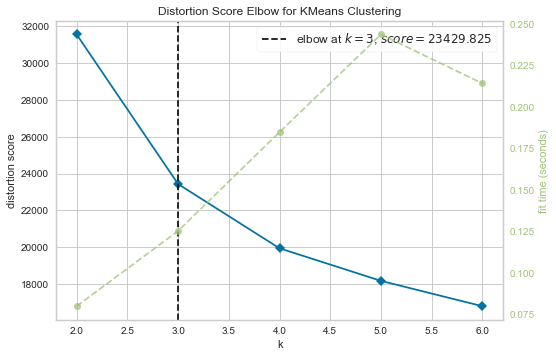

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,7))
visualizer.fit(df_pca)
visualizer.poof()

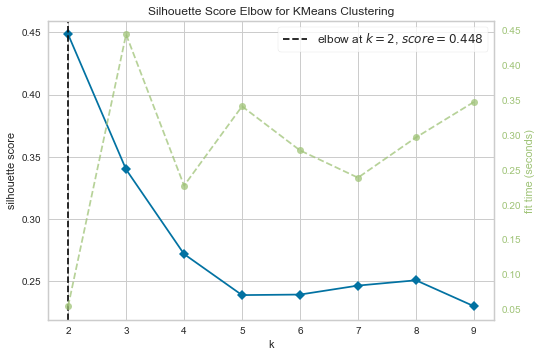

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10), metric='silhouette')
visualizer.fit(df_pca)
visualizer.poof()

In [ ]:
model = KMeans(5)
model.fit(df_pca)
y_pred = model.predict(df_pca)

In [ ]:
y_pred

array([1, 1, 1, ..., 0, 0, 2])

In [ ]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3, 4]), array([2258, 2378, 1780, 2191,  924], dtype=int64))

In [ ]:
model.cluster_centers_

array([[-1.34567129e+00, -2.65549148e-02, -4.24504160e-02,
         3.31112945e-04, -6.06735908e-02],
       [ 2.92571558e+00, -1.80036517e-01, -3.26205547e-02,
         1.21438361e-02,  3.09366576e-02],
       [-3.60463540e+00, -1.91779918e-02,  3.55274493e-02,
         5.34854248e-03,  6.27726570e-02],
       [ 6.77159208e-01, -3.51917034e-01, -6.23725893e-02,
         2.86071632e-02, -4.78519750e-02],
       [ 1.09669891e+00,  1.39775456e+00,  2.66791167e-01,
        -1.10049501e-01,  6.10746942e-02]])

In [ ]:
df_ml['cluster'] = model.labels_

In [ ]:
df_ml.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,cluster
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0,1
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0,1
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0,1


In [ ]:
df_group['cluster'] = model.labels_

In [ ]:
import seaborn as sns

In [ ]:
sns.set()

<AxesSubplot:xlabel='cluster', ylabel='weekday'>

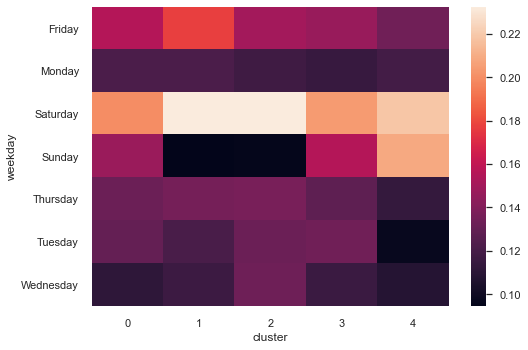

In [ ]:
sns.heatmap(pd.crosstab(df_group.weekday, df_group.cluster, normalize='columns'))

<AxesSubplot:xlabel='cluster', ylabel='hour'>

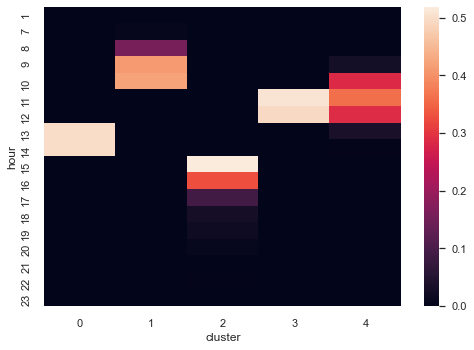

In [ ]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

In [ ]:
items = df[['Transaction', 'Item']]

In [ ]:
clusters = df_group['cluster'].reset_index()

In [ ]:
merged = pd.merge(items, clusters, on='Transaction')

In [ ]:
merged.groupby('cluster').Item.apply(lambda x: (x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

cluster               
0        Coffee           22
         Bread            13
         Tea               8
         Sandwich          7
         Cake              6
1        Coffee           26
         Bread            23
         Pastry            9
         Medialuna         6
         Tea               4
2        Coffee           23
         Bread            14
         Tea               9
         Cake              8
         Hot chocolate     5
3        Bread            23
         Coffee           21
         NONE              5
         Cake              4
         Pastry            4
4        Coffee           38
         Tea               8
         Hot chocolate     5
         Bread             5
         Pastry            4
Name: Item, dtype: int32

<AxesSubplot:xlabel='cluster', ylabel='hour'>

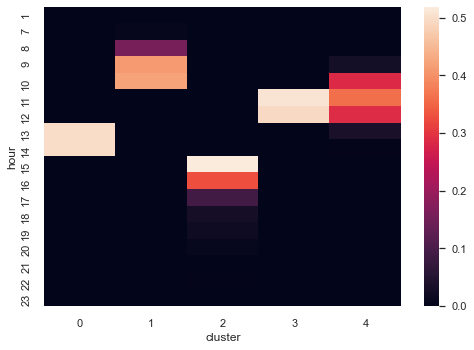

In [ ]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

# Approach #2. Just KMeans


In [ ]:
model = KMeans(5)
model.fit(df_ml.drop('cluster', axis=1))
model.labels_

array([1, 4, 4, ..., 0, 0, 0])

In [ ]:
df_ml.cluster = model.labels_

In [ ]:
df_group.cluster = model.labels_

In [ ]:
df_group.cluster.value_counts()

4    2712
2    2510
0    2054
1    1399
3     856
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='weekday'>

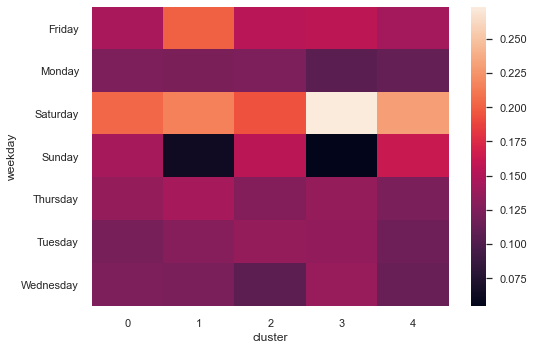

In [ ]:
sns.heatmap(pd.crosstab(df_group.weekday, df_group.cluster, normalize='columns'))

<AxesSubplot:xlabel='cluster', ylabel='hour'>

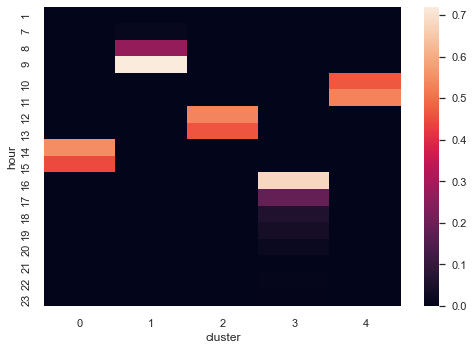

In [ ]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

In [ ]:
clusters = df_group['cluster'].reset_index()
merged = pd.merge(items, clusters, on='Transaction')
merged.groupby('cluster').Item.apply(lambda x: (x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

cluster               
0        Coffee           24
         Bread            13
         Tea               9
         Cake              7
         Sandwich          5
1        Coffee           29
         Bread            21
         Pastry            9
         Medialuna         6
         Tea               5
2        Coffee           23
         Bread            14
         Sandwich          7
         Tea               6
         NONE              6
3        Coffee           22
         Bread            13
         Tea               9
         Cake              8
         Hot chocolate     5
4        Coffee           30
         Bread            17
         Pastry            6
         Tea               6
         Medialuna         4
Name: Item, dtype: int32

# Last approach. Scale down + PCA + KMeans

In [ ]:
df_ml.hour = df_ml.hour/24

In [ ]:
pca = PCA(0.85)
pca.fit(df_ml.drop('cluster', axis = 1))
df_pca = pca.transform(df_ml.drop('cluster', axis = 1))

In [ ]:
model = KMeans(5)
model.fit(df_pca)

KMeans(n_clusters=5)

In [ ]:
df_ml.cluster = model.labels_
df_group.cluster = model.labels_

In [ ]:
df_group.cluster.value_counts()

2    2818
0    2504
3    1798
1    1429
4     982
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='weekday'>

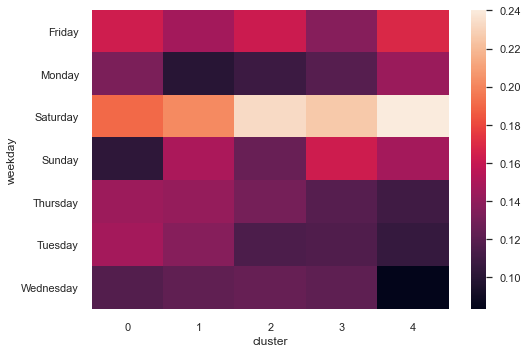

In [ ]:
sns.heatmap(pd.crosstab(df_group.weekday, df_group.cluster, normalize='columns'))

<AxesSubplot:xlabel='cluster', ylabel='hour'>

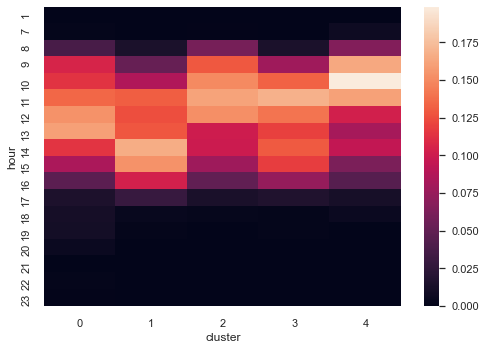

In [ ]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


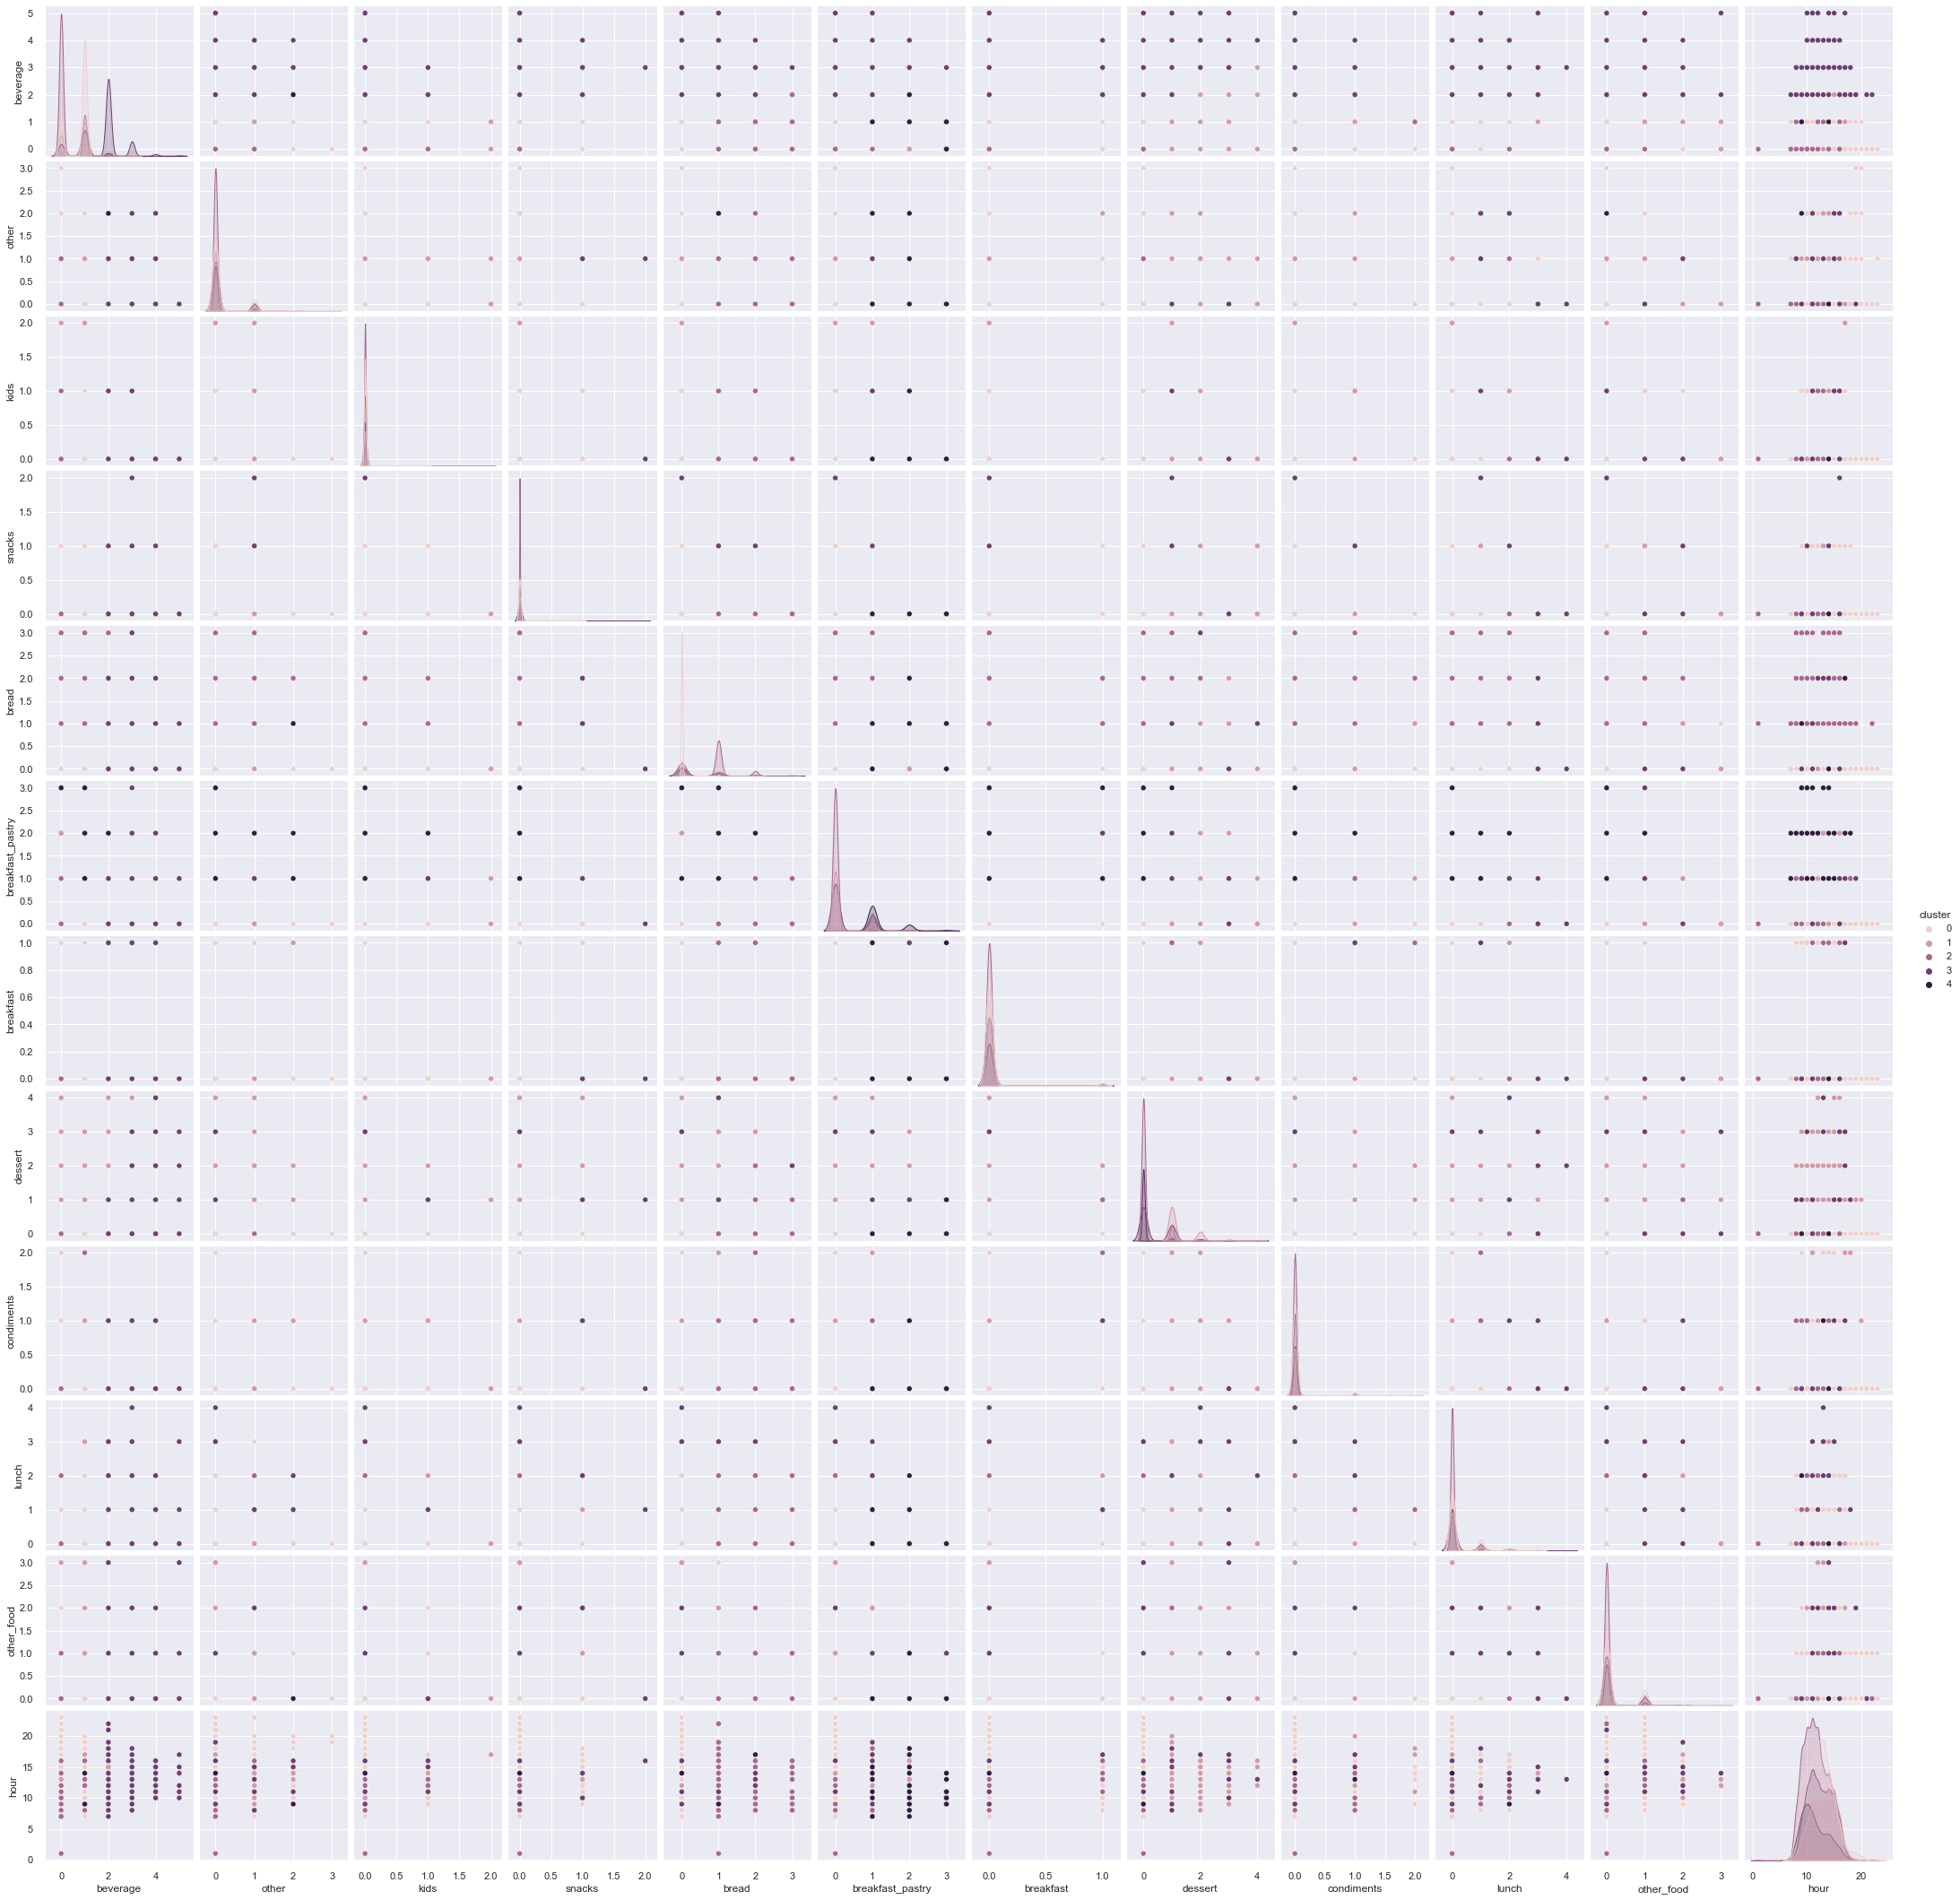

In [ ]:
sns.pairplot(df_group, hue='cluster')

In [ ]:
clusters = df_group['cluster'].reset_index()
merged = pd.merge(items, clusters, on='Transaction')
merged.groupby('cluster').Item.apply(lambda x: (x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

cluster               
0        Coffee           39
         Tea               9
         Sandwich          8
         NONE              8
         Farm House        7
1        Cake             17
         Coffee           17
         Cookies           8
         Brownie           7
         Alfajores         6
2        Bread            51
         Coffee            9
         Scandinavian      5
         Toast             3
         Pastry            3
3        Coffee           37
         Tea              10
         Hot chocolate     6
         Bread             5
         Cake              4
4        Coffee           25
         Pastry           20
         Medialuna        16
         Muffin            8
         Bread             7
Name: Item, dtype: int32

# Evaluation

In [ ]:
from sklearn.datasets import make_moons, make_blobs

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
X,y = make_blobs(random_state = 42)

In [ ]:
X.shape

(100, 2)

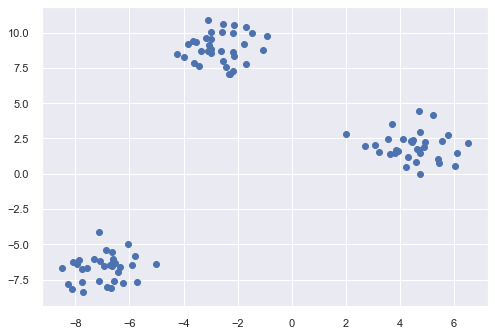

In [ ]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
km = KMeans(3)
ac = AgglomerativeClustering(3)

In [ ]:
km.fit(X)
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
km_labels = km.labels_
ac_labels = ac.labels_

In [ ]:
print('Silhouette score for KMeans is', silhouette_score(X, km_labels))
print('Silhouette score for Agglomerative is', silhouette_score(X, ac_labels))

Silhouette score for KMeans is 0.8469881221532085
Silhouette score for Agglomerative is 0.8469881221532085


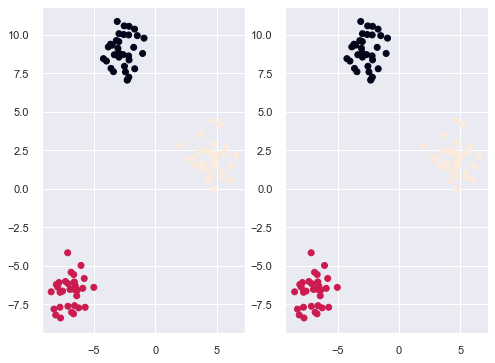

In [ ]:
_, [ax1, ax2] = plt.subplots(1,2, figsize=(8,6))
ax1.scatter(X[:,0], X[:,1], c = km_labels)
ax2.scatter(X[:,0], X[:,1], c = ac_labels)

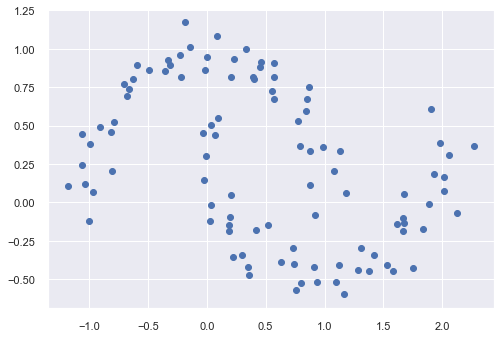

In [ ]:
X,y = make_moons(random_state = 42, noise=0.1)
plt.scatter(X[:,0], X[:,1])

In [ ]:
km = KMeans(2)
ac = AgglomerativeClustering(2, linkage='single')
km.fit(X)
ac.fit(X)
km_labels = km.labels_
ac_labels = ac.labels_

In [ ]:
print('Silhouette score for KMeans is', silhouette_score(X, km_labels))
print('Silhouette score for Agglomerative is', silhouette_score(X, ac_labels))

Silhouette score for KMeans is 0.4767042663096479
Silhouette score for Agglomerative is 0.3075102992009324


In [ ]:
print('Davies-Bouldin score for KMeans is', davies_bouldin_score(X, km_labels))
print('Davies-Bouldin for Agglomerative is', davies_bouldin_score(X, ac_labels))

Davies-Bouldin score for KMeans is 0.7835429631981143
Davies-Bouldin for Agglomerative is 1.1904671758172507


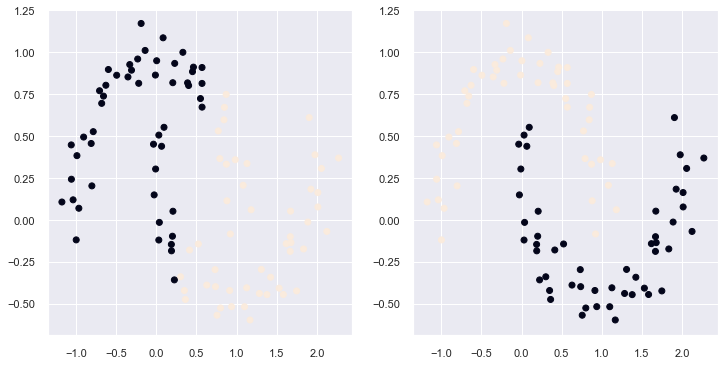

In [ ]:
_, [ax1, ax2] = plt.subplots(1,2, figsize=(12,6))
ax1.scatter(X[:,0], X[:,1], c = km_labels)
ax2.scatter(X[:,0], X[:,1], c = ac_labels)